In [48]:
#import the classes requiremnets of the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [49]:
#load the data
df = pd.read_csv('netflix_titles.csv' , lineterminator= '\n')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


df.info()
df.shape

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
df['country'] = df['country'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")


In [21]:
df.duplicated().sum()
df = df.drop_duplicates()

In [30]:
df['date_added'] = pd.to_datetime(df['date_added'], errors ='coerce')
print(df['date_added'].dtype)

datetime64[ns]


In [36]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [37]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8719 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8719 non-null   float64       
 13  month_added   8719 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


Text(0.5, 1.0, 'Movies vs TV Shows')

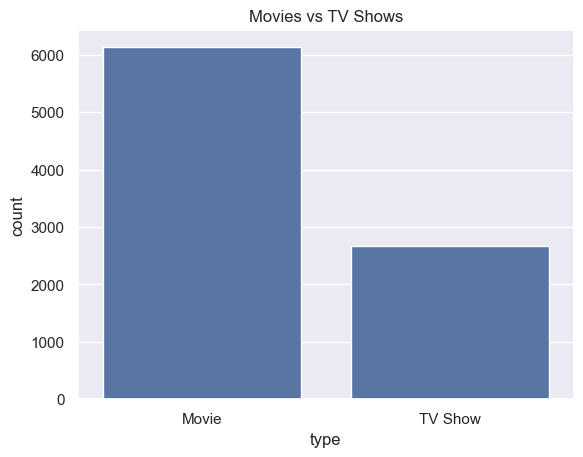

In [40]:
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows")

In [41]:
df['listed_in'].value_counts().head(10)


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

<Axes: xlabel='country'>

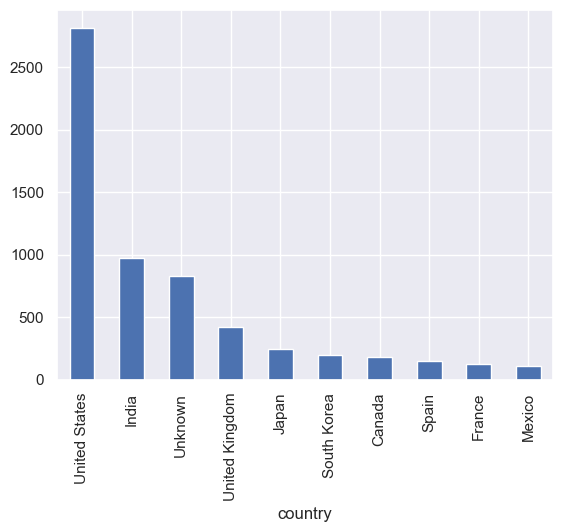

In [42]:
df['country'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='release_year', ylabel='Count'>

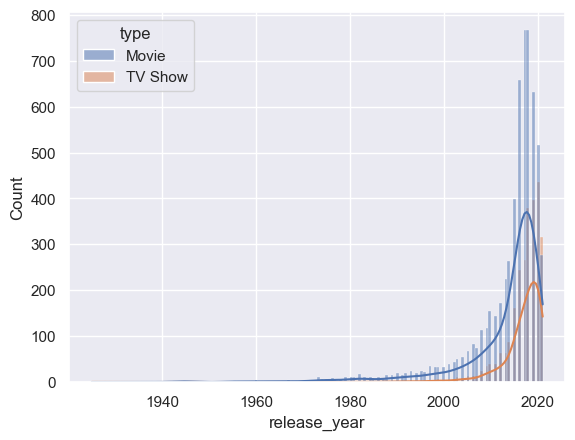

In [43]:
sns.histplot(data=df, x='release_year', hue='type', kde=True)


<Axes: xlabel='year_added'>

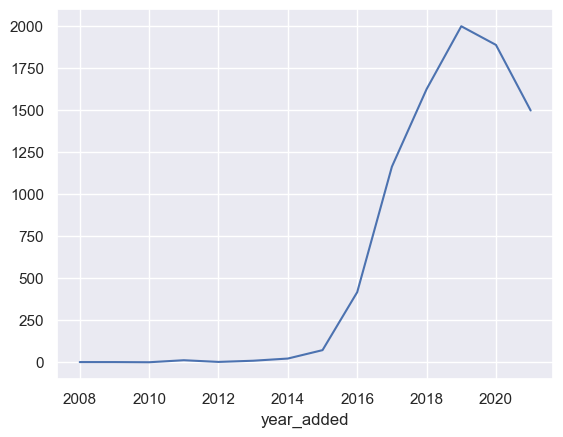

In [44]:
df['year_added'].value_counts().sort_index().plot(kind='line')


<Axes: xlabel='count', ylabel='rating'>

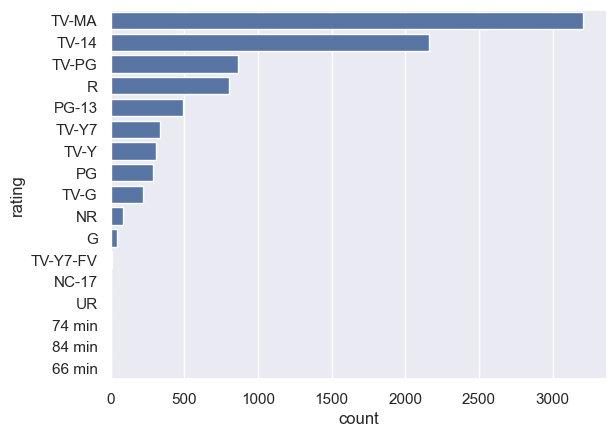

In [45]:
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index)


<Axes: >

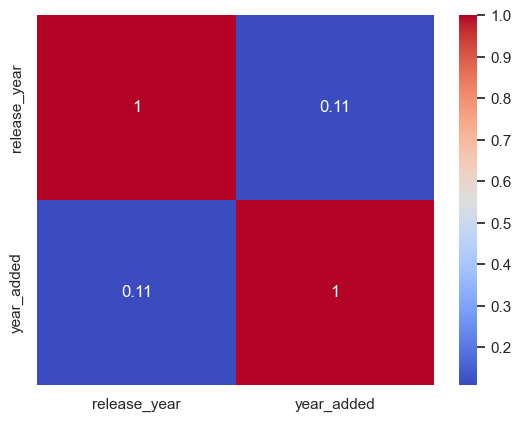

In [47]:
numeric_cols = ['release_year', 'year_added']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')